# Importation des données

In [20]:
import pandas as pd
from sklearn.decomposition import PCA

# Votre DataFrame
data = {
    'Pays': ['USA', 'Allemagne', 'Japon', 'Chine', 'Brésil'],
    'PIB par habitant': [62.9, 50.3, 42.1, 16.4, 15.1],
    'IDH': [0.92, 0.89, 0.92, 0.75, 0.73],
    'Taux de chômage': [4.2, 3.6, 2.8, 5.1, 12.5]
}

df = pd.DataFrame(data)
df

,Pays,PIB par habitant,IDH,Taux de chômage
0,USA,62.9,0.92,4.2
1,Allemagne,50.3,0.89,3.6
2,Japon,42.1,0.92,2.8
3,Chine,16.4,0.75,5.1
4,Brésil,15.1,0.73,12.5


# Préparation des données

In [38]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['PIB par habitant', 'IDH', 'Taux de chômage']

# Extraction des données numériques
numeric_data = df[numeric_cols]

# Instanciation du StandardScaler
scaler = StandardScaler()

# Centrage et réduction des données
df[numeric_cols] = scaler.fit_transform(numeric_data)

# Affichage du DataFrame avec les données centrées et réduites
print(df)


        Pays  PIB par habitant       IDH  Taux de chômage
0        USA          1.354747  0.925951        -0.410085
1  Allemagne          0.686391  0.569816        -0.580954
2      Japon          0.251429  0.925951        -0.808779
3      Chine         -1.111805 -1.092147        -0.153782
4     Brésil         -1.180762 -1.329570         1.953599


In [31]:
# Calcul des moyennes des colonnes numériques
means = df[numeric_cols].mean()

# Calcul des écart-types des colonnes numériques
std_devs = df[numeric_cols].std()

# Affichage des moyennes et écart-types
print("Moyennes des colonnes numériques :\n", means)
print("\nÉcart-types des colonnes numériques :\n", std_devs)


Moyennes des colonnes numériques :
 PIB par habitant    0.000000e+00
IDH                 5.329071e-16
Taux de chômage    -1.776357e-16
dtype: float64

Écart-types des colonnes numériques :
 PIB par habitant    1.118034
IDH                 1.118034
Taux de chômage     1.118034
dtype: float64


# Analyse en composantes principales avec PCA de ‘’scikit-learn’’

# Instanciation et lancement des calculs

In [32]:
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) #

3


# Valeurs propres et scree plot

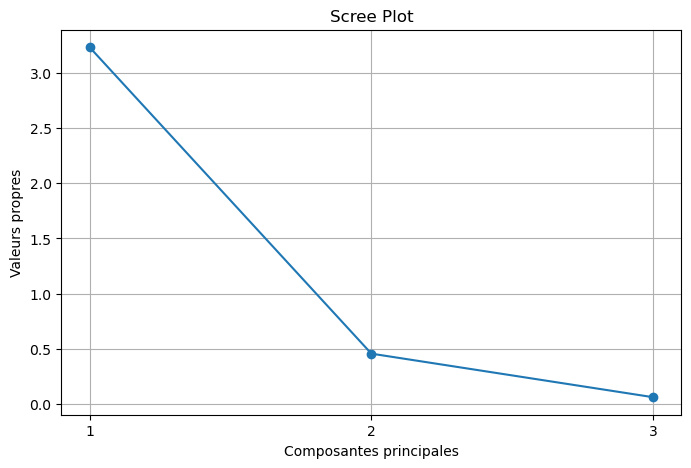

In [33]:
import matplotlib.pyplot as plt
# Calcul des valeurs propres
eigenvalues = acp.explained_variance_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Composantes principales')
plt.ylabel('Valeurs propres')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()

# Détermination du nombre de facteur à retenir

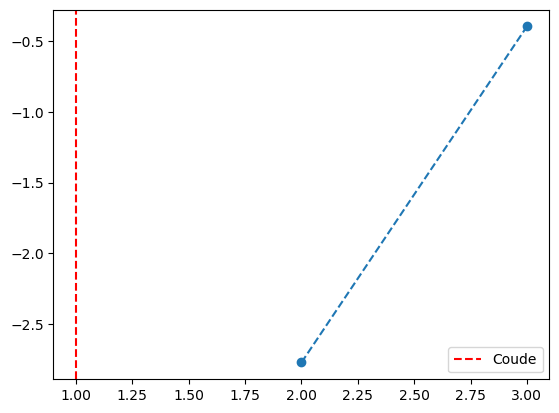

In [34]:
delta_eigenvalues = np.diff(eigenvalues)
plt.plot(range(2, len(eigenvalues) + 1), delta_eigenvalues, marker='o', linestyle='--')
plt.axvline(x=np.where(delta_eigenvalues < 0.2)[0][0] + 1, color='r', linestyle='--', label='Coude')
plt.legend()
plt.show()

# Représentation des variables

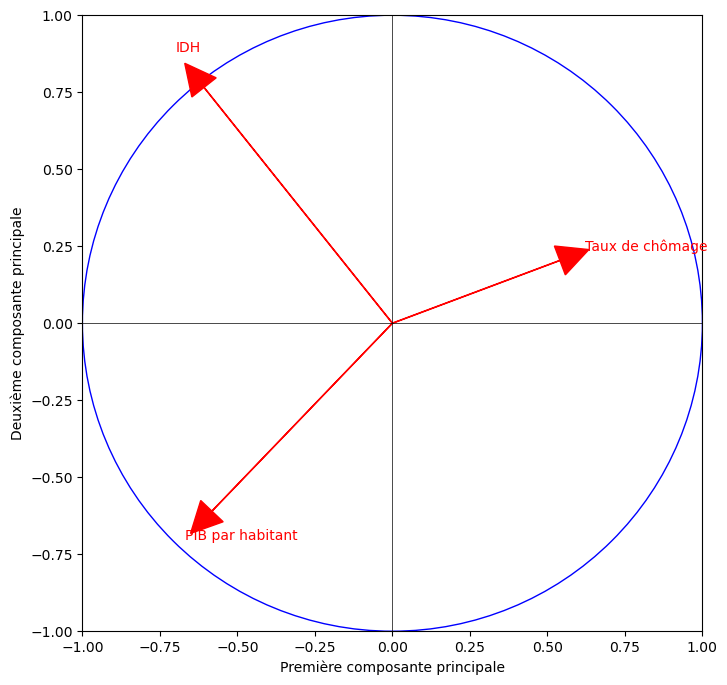

In [50]:

# Calcul de la matrice de covariance
cov_matrix = np.cov(df_scaled, rowvar=False)

# Calcul des valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Afficher le cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Dessiner le cercle
circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none')
ax.add_patch(circle)

# Dessiner les flèches des variables
for i in range(len(numeric_cols)):
    ax.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], head_width=0.1, head_length=0.1, fc='r', ec='r')
    ax.text(eigenvectors[i, 0] * 1.15, eigenvectors[i, 1] * 1.15, numeric_cols[i], color='r')

# Ajouter des axes et des étiquettes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')

# Afficher le graphique
plt.show()


# Scores des individus

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


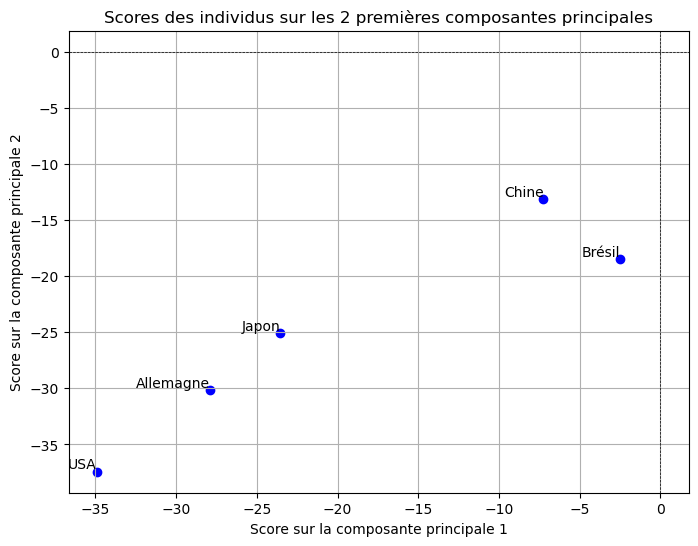

In [40]:
scores = acp.transform(numeric_data)

# Affichage des scores des individus
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(zip(scores[:, 0], scores[:, 1])):
    plt.scatter(x, y, color='blue')
    plt.text(x, y, df['Pays'][i], color='black', ha='right', va='bottom', fontsize=10)

plt.title('Scores des individus sur les 2 premières composantes principales')
plt.xlabel('Score sur la composante principale 1')
plt.ylabel('Score sur la composante principale 2')
plt.grid()
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.show()

# Saturations des variables

In [41]:
loadings = acp.components_.T * np.sqrt(acp.explained_variance_)

# Création d'un DataFrame pour afficher les saturations des variables
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=numeric_cols)
print("Saturations des variables (loadings) :")
print(loadings_df)

Saturations des variables (loadings) :
                       PC1       PC2       PC3
PIB par habitant -1.046353 -0.363250 -0.152297
IDH              -1.092313 -0.142576  0.191116
Taux de chômage   0.971043 -0.551804  0.050875


# Contribution d’un individu 

In [42]:
individual_contributions = (scores ** 2) / (scores ** 2).sum()

# Création d'un DataFrame pour afficher les contributions des individus
contributions_df = pd.DataFrame(individual_contributions, columns=['PC1', 'PC2', 'PC3'], index=df['Pays'])
print("Contributions des individus aux composantes principales :")
print(contributions_df)

Contributions des individus aux composantes principales :
                PC1       PC2       PC3
Pays                                   
USA        0.135678  0.156015  0.150939
Allemagne  0.086537  0.101306  0.095430
Japon      0.061779  0.070200  0.066358
Chine      0.005849  0.019217  0.007843
Brésil     0.000685  0.038012  0.004152


# Qualité de la representation d’un individu 

In [43]:
scores_individus = pd.DataFrame(Z, columns=['PC1', 'PC2', 'PC3'], index=df['Pays'])

# Calculer la contribution relative pour chaque individu et chaque composante principale
contribution_relative = (scores_individus ** 2) / (scores_individus ** 2).sum()

# Afficher les contributions relatives
print("Contribution relative des individus aux composantes principales :")
print(contribution_relative)

Contribution relative des individus aux composantes principales :
                PC1       PC2       PC3
Pays                                   
USA        0.367068  0.171477  0.033634
Allemagne  0.094227  0.064938  0.067501
Japon      0.012643  0.171477  0.130825
Chine      0.247222  0.238557  0.004730
Brésil     0.278840  0.353551  0.763310


# présentation graphique

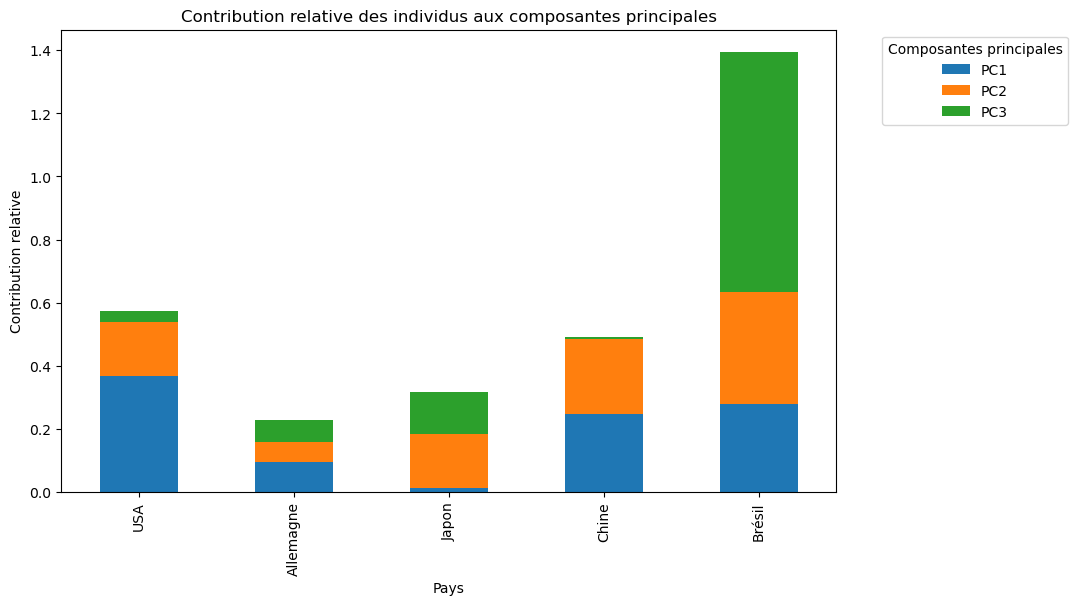

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
contribution_relative.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Contribution relative')
ax.set_xlabel('Pays')
ax.set_title('Contribution relative des individus aux composantes principales')
plt.legend(title='Composantes principales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Qualité de la representation d’une variable

In [45]:
variable_representation_quality = acp.components_.T ** 2 

# Création d'un DataFrame pour afficher la qualité de la représentation des variables
representation_quality_df = pd.DataFrame(variable_representation_quality, columns=['PC1', 'PC2', 'PC3'], index=numeric_cols)
print("Qualité de représentation des variables aux composantes principales :")
print(representation_quality_df)

Qualité de représentation des variables aux composantes principales :
                       PC1       PC2       PC3
PIB par habitant  0.338867  0.288880  0.372253
IDH               0.369289  0.044504  0.586207
Taux de chômage   0.291843  0.666616  0.041540


# présentation graphique

Qualité de représentation des variables aux composantes principales :
                       PC1       PC2       PC3
PIB par habitant  0.338867  0.288880  0.372253
IDH               0.369289  0.044504  0.586207
Taux de chômage   0.291843  0.666616  0.041540


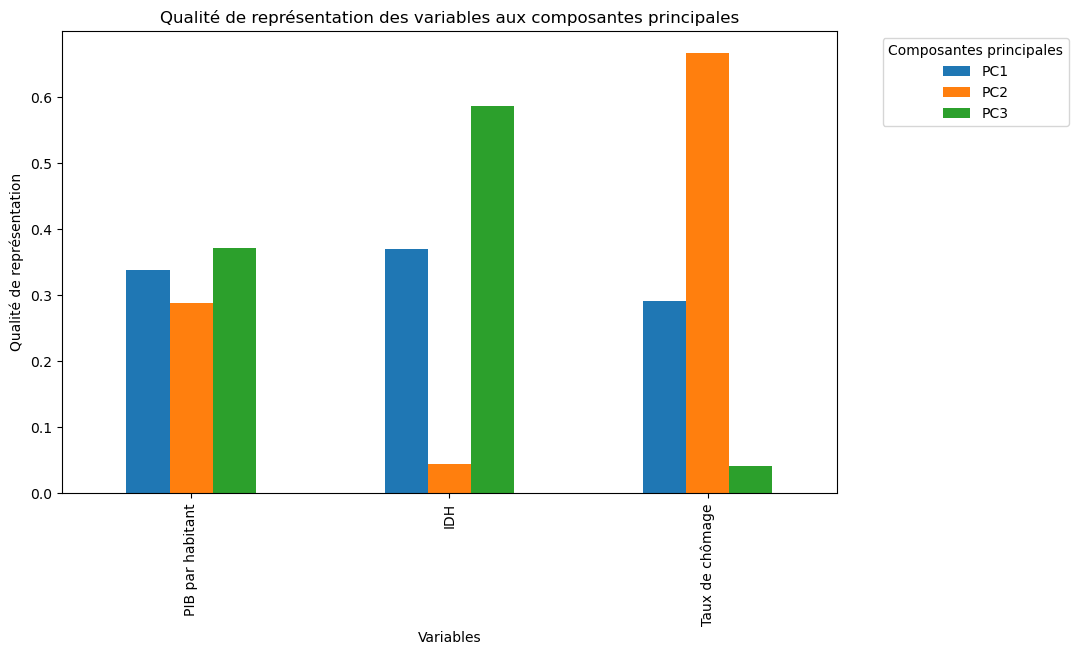

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous avez déjà effectué l'ACP et stocké les composantes principales dans "acp.components_"
# Supposons également que vous avez une liste de noms de variables numériques appelée "numeric_cols"

# Calcul de la qualité de représentation des variables
variable_representation_quality = acp.components_.T ** 2 

# Création d'un DataFrame pour afficher la qualité de la représentation des variables
representation_quality_df = pd.DataFrame(variable_representation_quality, columns=['PC1', 'PC2', 'PC3'], index=numeric_cols)

# Affichage de la qualité de représentation des variables
print("Qualité de représentation des variables aux composantes principales :")
print(representation_quality_df)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
representation_quality_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Qualité de représentation')
ax.set_xlabel('Variables')
ax.set_title('Qualité de représentation des variables aux composantes principales')
plt.legend(title='Composantes principales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Interprétation**
* Si une variable a une forte qualité de représentation dans une composante principale particulière, cela signifie que cette variable est fortement corrélée à cette composante principale et qu'elle contribue significativement à sa formation.
* Si une variable a une faible qualité de représentation dans toutes les composantes principales, elle peut avoir une contribution plus équilibrée à travers toutes les composantes principales ou ne pas être fortement corrélée à aucune d'entre elles.